# Project Introduction: Exploring Delhi Metro Network through Station Analysis

This project aims to deeply analyze the Delhi Metro network, focusing on its stations within the bustling cityscape. By thoroughly cleaning data, using visualization tools, and conducting detailed analysis, we seek to uncover insights about station evolution, distribution, ridership, and network density.

## Overview:

The project is divided into five main parts, each concentrating on a vital aspect of metro station analysis:

## a) Data Cleaning and Visualization:

We prioritize data integrity by removing duplicates, fixing location discrepancies, and organizing the dataset for clarity. Visualizations using folium help us grasp station distribution and characteristics effectively.

## b) Average Ridership Comparison on Busiest Day:

We analyze ridership across metro lines on September 4th, 2023, understanding how each line copes with peak transit demands.

## c) Temporal Analysis:

Tracing station growth from 2002 to 2019, both per line and overall, helps us understand the metro network's evolution, identifying key milestones and phases of expansion.

## d) Ground Layout Analysis:

Visualizing station distribution on the ground offers insights into urban development. We explore how station openings correlate with ground layout characteristics, providing a nuanced understanding of metro infrastructure integration with the cityscape.

## e) Average and Total Distance Analysis:

We calculate the distance between stations per line, crucial for optimizing transit routes and improving accessibility.



# Dataset 
## The provided dataset contains information about several metro stations, including their:

- **Station ID**
- **Station Name**
- **Distance from Start (km)**
- **Line**
- **Opening Date**
- **Station Layout**
- **Geographical Coordinates (Latitude and Longitude)**

These stations are part of a diverse metro network, facilitating transportation across different areas.

The dataset showcases the evolution and expansion of the metro system over time, with stations ranging from those opened in the early 2000s to more recent additions in the late 2010s. Each station serves as a crucial node within its respective metro line, contributing to the overall connectivity and accessibility of the urban landscape.

This dataset provides valuable insights for various analyses, such as understanding the distribution of metro infrastructure, identifying transportation patterns, and assessing the impact of metro development on urban mobility and accessibility. It serves as a foundation for further research and planning aimed at enhancing public transportation systems and fostering sustainable urban development.

Dataset: https://www.kaggle.com/datasets/kunalgupta2616/delhi-metro-stations-data

Data Cleaning and fixing coordinates of locations from: https://mapcarta.com/


In [329]:
import numpy as np
import pandas as pd 
import folium


# A) Read DataSet

In [330]:
metro = pd.read_csv("Delhi_metro.csv")


# B) Data Cleaning and Data Visualization

In [331]:
metro.head()

,Station ID,Station Name,Distance from Start (km),Line,Opening Date,Station Layout,Latitude,Longitude
0,1,Jhil Mil,10.3,Red line,2008-04-06,Elevated,28.675790,77.312390
1,2,Welcome [Conn: Red],46.8,Pink line,2018-10-31,Elevated,28.671800,77.277560
2,3,DLF Phase 3,10.0,Rapid Metro,2013-11-14,Elevated,28.493600,77.093500
3,4,Okhla NSIC,23.8,Magenta line,2017-12-25,Elevated,28.554483,77.264849
4,5,Dwarka Mor,10.2,Blue line,2005-12-30,Elevated,28.619320,77.033260


In [332]:
metro.shape


(285, 8)

In [333]:
metro['Line'].unique()

array(['Red line', 'Pink line', 'Rapid Metro', 'Magenta line',
       'Blue line', 'Aqua line', 'Voilet line', 'Yellow line',
       'Green line', 'Gray line', 'Orange line', 'Green line branch',
       'Blue line branch'], dtype=object)

In [334]:
missing_values = metro.isnull().sum()
data_types = metro.dtypes

In [335]:
missing_values

Station ID                  0
Station Name                0
Distance from Start (km)    0
Line                        0
Opening Date                0
Station Layout              0
Latitude                    0
Longitude                   0
dtype: int64

In [336]:
data_types

Station ID                    int64
Station Name                 object
Distance from Start (km)    float64
Line                         object
Opening Date                 object
Station Layout               object
Latitude                    float64
Longitude                   float64
dtype: object

In [337]:

metro['Opening Date'] = pd.to_datetime(metro['Opening Date'])


In [338]:
line_colors = {
    'Red line': 'red',
    'Blue line': 'darkblue',
    'Yellow line': 'beige',
    'Green line': 'green',
    'Voilet line': 'purple',
    'Pink line': 'pink',
    'Magenta line': 'darkpurple',
    'Orange line': 'orange',
    'Rapid Metro': 'cadetblue',
    'Aqua line': 'lightblue',
    'Green line branch': 'lightgreen',
    'Blue line branch': 'blue',
    'Gray line': 'lightgray'
}

delhi_map = folium.Map(location=[28.7041, 77.1025], zoom_start=11)

for index, row in metro.iterrows():
    line = row['Line']
    color = line_colors.get(line, 'black')  
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Station Name']}",
        tooltip=f"{row['Station Name']}, {line}",
        icon=folium.Icon(color=color, icon='map-marker')  
    ).add_to(delhi_map)

delhi_map


## Fixing the coordinates for multiple stations across all lines

In [339]:
metro[metro.duplicated(subset=['Latitude', 'Longitude'], keep=False)]



,Station ID,Station Name,Distance from Start (km),Line,Opening Date,Station Layout,Latitude,Longitude
1,2,Welcome [Conn: Red],46.8,Pink line,2018-10-31,Elevated,28.671800,77.277560
2,3,DLF Phase 3,10.0,Rapid Metro,2013-11-14,Elevated,28.493600,77.093500
10,11,Central Secretariat [Conn: Violet],19.4,Yellow line,2005-03-07,Underground,28.614740,77.211910
18,19,Belvedere Towers,8.0,Rapid Metro,2013-11-14,Elevated,28.493600,77.093500
28,29,Delta 1 Greater Noida,24.9,Aqua line,2019-01-25,Elevated,28.474388,77.503990
31,32,Kashmere Gate [Conn: Yellow],0.0,Voilet line,2017-05-28,Underground,28.667500,77.228170
36,37,Dwarka Sector 21(First station) [Conn: Orange],0.0,Blue line,2010-10-30,Underground,28.552260,77.058280
39,40,Old Faridabad,35.4,Voilet line,2015-06-09,Elevated,28.480863,77.084888
54,55,Inderlok Conn:Red,0.0,Green line,2010-02-04,Elevated,28.673190,77.169940
57,58,Noida Sector 148,18.9,Aqua line,2019-01-25,Elevated,28.475835,77.554479


# Note
## We checked if any of the ststion has an overlap of Lattitude and Longitudes as a subset, if we find any ststions having duplicate values it means one of the two things below: 

     a) The station is a connecting station and the name shuld have connecting status in it or the line should be a brancg line.
    
     b) The coordinates of the station is wrong.

In [340]:

metro.loc[metro['Station Name'] == 'Noida Sector 145', 'Latitude'] = 28.4840992
metro.loc[metro['Station Name'] == 'Noida Sector 145', 'Longitude'] = 77.4488389

metro.loc[metro['Station Name'] == 'Noida Sector 146', 'Latitude'] = 28.4695822
metro.loc[metro['Station Name'] == 'Noida Sector 146', 'Longitude'] = 77.4581742

metro.loc[metro['Station Name'] == 'Noida Sector 144', 'Latitude'] = 28.4958
metro.loc[metro['Station Name'] == 'Noida Sector 144', 'Longitude'] = 77.4339

metro.loc[metro['Station Name'] == 'Noida Sector 147', 'Latitude'] = 28.4594
metro.loc[metro['Station Name'] == 'Noida Sector 147', 'Longitude'] = 77.4660

metro.loc[metro['Station Name'] == 'Shyam park', 'Latitude'] = 28.6782
metro.loc[metro['Station Name'] == 'Shyam park', 'Longitude'] = 77.3702

metro.loc[metro['Station Name'] == 'Shaheed Nagar', 'Latitude'] = 28.6766
metro.loc[metro['Station Name'] == 'Shaheed Nagar', 'Longitude'] = 77.3338

metro.loc[metro['Station Name'] == 'Raj Bagh', 'Latitude'] = 28.6770
metro.loc[metro['Station Name'] == 'Raj Bagh', 'Longitude'] = 77.3466

metro.loc[metro['Station Name'] == 'MG Road', 'Latitude'] = 28.4796
metro.loc[metro['Station Name'] == 'MG Road', 'Longitude'] = 77.08006

metro.loc[metro['Station Name'] == 'Mohan Nagar', 'Latitude'] = 28.6785
metro.loc[metro['Station Name'] == 'Mohan Nagar', 'Longitude'] = 77.3839

metro.loc[metro['Station Name'] == 'Shalimar Bagh', 'Latitude'] = 28.7018
metro.loc[metro['Station Name'] == 'Shalimar Bagh', 'Longitude'] = 77.1652

metro.loc[metro['Station Name'] == 'Shiv Vihar', 'Latitude'] = 28.6203
metro.loc[metro['Station Name'] == 'Shiv Vihar', 'Longitude'] = 77.0451

metro.loc[metro['Station Name'] == 'South Extension', 'Latitude'] = 28.575327
metro.loc[metro['Station Name'] == 'South Extension', 'Longitude'] = 77.223526

metro.loc[metro['Station Name'] == 'Lal Quila', 'Latitude'] = 28.656473
metro.loc[metro['Station Name'] == 'Lal Quila', 'Longitude'] = 77.242943

metro.loc[metro['Station Name'] == 'N.H.P.C. Chowk', 'Latitude'] = 28.45769
metro.loc[metro['Station Name'] == 'N.H.P.C. Chowk', 'Longitude'] = 77.3074

metro.loc[metro['Station Name'] == 'Sector 28 Faridabad', 'Latitude'] = 28.4334058
metro.loc[metro['Station Name'] == 'Sector 28 Faridabad', 'Longitude'] = 77.3141536

metro.loc[metro['Station Name'] == 'Hindon River', 'Latitude'] = 28.6734
metro.loc[metro['Station Name'] == 'Hindon River', 'Longitude'] = 77.4064

metro.loc[metro['Station Name'] == 'Noida Sector 34', 'Latitude'] = 28.5801
metro.loc[metro['Station Name'] == 'Noida Sector 34', 'Longitude'] = 77.3635

metro.loc[metro['Station Name'] == 'Delhi Cantt', 'Latitude'] = 28.5801
metro.loc[metro['Station Name'] == 'Delhi Cantt', 'Longitude'] = 77.3635

metro.loc[metro['Station Name'] == 'Noida Sector 61', 'Latitude'] = 28.59759
metro.loc[metro['Station Name'] == 'Noida Sector 61', 'Longitude'] = 77.37227

metro.loc[metro['Station Name'] == 'Noida Sector 52 [Conn: Aqua]', 'Latitude'] = 28.5880382
metro.loc[metro['Station Name'] == 'Noida Sector 52 [Conn: Aqua]', 'Longitude'] = 77.3691595

metro.loc[metro['Station Name'] == 'Noida Sector 62', 'Latitude'] = 28.629973
metro.loc[metro['Station Name'] == 'Noida Sector 62', 'Longitude'] = 77.374661

metro.loc[metro['Station Name'] == 'Noida Sector 59', 'Latitude'] = 28.60653
metro.loc[metro['Station Name'] == 'Noida Sector 59', 'Longitude'] = 77.37268

metro.loc[metro['Station Name'] == 'Old Faridabad', 'Latitude'] = 28.41078
metro.loc[metro['Station Name'] == 'Old Faridabad', 'Longitude'] = 77.31144

metro.loc[metro['Station Name'] == 'Delhi Cantt', 'Latitude'] = 28.60867
metro.loc[metro['Station Name'] == 'Delhi Cantt', 'Longitude'] = 77.14048

metro.loc[metro['Station Name'] == 'Sarai Kale Khan Hazrat Nizamuddin', 'Latitude'] = 28.58875
metro.loc[metro['Station Name'] == 'Sarai Kale Khan Hazrat Nizamuddin', 'Longitude'] = 77.25725

metro.loc[metro['Station Name'] == 'Noida Sector 142', 'Latitude'] = 28.49906
metro.loc[metro['Station Name'] == 'Noida Sector 142', 'Longitude'] = 77.41275

metro.loc[metro['Station Name'] == 'Noida Sector 148', 'Latitude'] = 28.44806
metro.loc[metro['Station Name'] == 'Noida Sector 148', 'Longitude'] = 77.4766

metro.loc[metro['Station Name'] == 'Noida Sector 81', 'Latitude'] = 28.5493
metro.loc[metro['Station Name'] == 'Noida Sector 81', 'Longitude'] = 77.38995

metro.loc[metro['Station Name'] == 'Rajouri Garden [Conn: Blue]', 'Latitude'] = 28.65119
metro.loc[metro['Station Name'] == 'Rajouri Garden [Conn: Blue]', 'Longitude'] = 77.12426

metro.loc[metro['Station Name'] == 'Ashok Park Main', 'Latitude'] = 28.67161
metro.loc[metro['Station Name'] == 'Ashok Park Main', 'Longitude'] = 77.15529

metro.loc[metro['Station Name'] == 'Dwarka [Conn: Blue]', 'Latitude'] = 28.6149
metro.loc[metro['Station Name'] == 'Dwarka [Conn: Blue]', 'Longitude'] = 77.0227

metro.loc[metro['Station Name'] == 'Delta 1 Greater Noida', 'Latitude'] = 28.481661
metro.loc[metro['Station Name'] == 'Delta 1 Greater Noida', 'Longitude'] = 77.526113

metro.loc[metro['Station Name'] == 'Noida Sector 50', 'Latitude'] = 28.57436
metro.loc[metro['Station Name'] == 'Noida Sector 50', 'Longitude'] = 77.37824

metro.loc[metro['Station Name'] == 'GNIDA Office', 'Latitude'] = 28.48468
metro.loc[metro['Station Name'] == 'GNIDA Office', 'Longitude'] = 77.5365

metro.loc[metro['Station Name'] == 'Terminal 1 IGI Airport', 'Latitude'] = 28.56484
metro.loc[metro['Station Name'] == 'Terminal 1 IGI Airport', 'Longitude'] = 77.12266

metro.loc[metro['Station Name'] == 'Yamuna Bank', 'Latitude'] = 28.62328
metro.loc[metro['Station Name'] == 'Yamuna Bank', 'Longitude'] = 77.26789

metro.loc[metro['Station Name'] == 'Sadar Bazaar Cantonment', 'Latitude'] = 28.57716
metro.loc[metro['Station Name'] == 'Sadar Bazaar Cantonment', 'Longitude'] = 77.11119

	
metro.loc[metro['Station Name'] == 'NSEZ Noida', 'Latitude'] = 28.5324
metro.loc[metro['Station Name'] == 'NSEZ Noida', 'Longitude'] = 77.39475

metro.loc[metro['Station Name'] == 'Shiv Vihar', 'Latitude'] = 28.72138
metro.loc[metro['Station Name'] == 'Shiv Vihar', 'Longitude'] = 77.28946

metro.loc[metro['Station Name'] == 'Sarai', 'Latitude'] = 28.47808
metro.loc[metro['Station Name'] == 'Sarai', 'Longitude'] = 77.30483

metro.loc[metro['Station Name'] == 'Central Secretariat [Conn: Yellow]', 'Latitude'] = 28.61588
metro.loc[metro['Station Name'] == 'Central Secretariat [Conn: Yellow]', 'Longitude'] = 77.21228

metro.loc[metro['Station Name'] == 'Janpath', 'Latitude'] = 28.62405
metro.loc[metro['Station Name'] == 'Janpath', 'Longitude'] = 77.21926

metro.loc[metro['Station Name'] == 'Depot Greater Noida', 'Latitude'] = 28.48901
metro.loc[metro['Station Name'] == 'Depot Greater Noida', 'Longitude'] = 77.54401

In [341]:
metro[metro.duplicated(subset=['Latitude', 'Longitude'], keep=False)]



,Station ID,Station Name,Distance from Start (km),Line,Opening Date,Station Layout,Latitude,Longitude
1,2,Welcome [Conn: Red],46.8,Pink line,2018-10-31,Elevated,28.67180,77.27756
2,3,DLF Phase 3,10.0,Rapid Metro,2013-11-14,Elevated,28.49360,77.09350
18,19,Belvedere Towers,8.0,Rapid Metro,2013-11-14,Elevated,28.49360,77.09350
31,32,Kashmere Gate [Conn: Yellow],0.0,Voilet line,2017-05-28,Underground,28.66750,77.22817
36,37,Dwarka Sector 21(First station) [Conn: Orange],0.0,Blue line,2010-10-30,Underground,28.55226,77.05828
54,55,Inderlok Conn:Red,0.0,Green line,2010-02-04,Elevated,28.67319,77.16994
66,67,"Kashmere Gate [Conn: Violet,Yellow]",18.5,Red line,2002-12-24,Elevated,28.66750,77.22817
84,85,Sikandarpur [Conn: Yellow],6.6,Rapid Metro,2013-11-14,Elevated,28.49360,77.09350
95,96,Sector 55-66,0.0,Rapid Metro,2017-03-31,Elevated,28.49360,77.09350
111,112,Kirti Nagar [Conn: Blue],2.1,Green line branch,2011-08-27,At-Grade,28.65575,77.15057


In [342]:

line_colors = {
    'Red line': 'red',
    'Blue line': 'darkblue',
    'Yellow line': 'beige',
    'Green line': 'green',
    'Voilet line': 'purple',
    'Pink line': 'pink',
    'Magenta line': 'darkpurple',
    'Orange line': 'orange',
    'Rapid Metro': 'cadetblue',
    'Aqua line': 'lightblue',
    'Green line branch': 'lightgreen',
    'Blue line branch': 'blue',
    'Gray line': 'lightgray'
}

delhi_map = folium.Map(location=[28.7041, 77.1025], zoom_start=11)

for index, row in metro.iterrows():
    line = row['Line']
    color = line_colors.get(line, 'black')  
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Station Name']}",
        tooltip=f"{row['Station Name']}, {line}",
        icon=folium.Icon(color=color, icon='map-marker')  
    ).add_to(delhi_map)

delhi_map

## Fixing the coordinates of Rapid Metro Line

In [343]:
metro[metro['Line'] == 'Rapid Metro']

,Station ID,Station Name,Distance from Start (km),Line,Opening Date,Station Layout,Latitude,Longitude
2,3,DLF Phase 3,10.0,Rapid Metro,2013-11-14,Elevated,28.4936,77.0935
18,19,Belvedere Towers,8.0,Rapid Metro,2013-11-14,Elevated,28.4936,77.0935
84,85,Sikandarpur [Conn: Yellow],6.6,Rapid Metro,2013-11-14,Elevated,28.4936,77.0935
95,96,Sector 55-66,0.0,Rapid Metro,2017-03-31,Elevated,28.4936,77.0935
117,118,Cyber City,8.6,Rapid Metro,2014-07-05,Elevated,28.4936,77.0935
146,147,Sector 54 Chowk,1.1,Rapid Metro,2017-03-31,Elevated,28.4936,77.0935
167,168,Sector 42-43,3.9,Rapid Metro,2017-04-25,Elevated,28.4936,77.0935
194,195,Moulsari Avenue,9.2,Rapid Metro,2013-11-14,Elevated,28.4936,77.0935
198,199,DLF Phase 2,7.3,Rapid Metro,2013-11-14,Elevated,28.4936,77.0935
271,272,Sector 53-54,2.6,Rapid Metro,2017-04-25,Elevated,28.4936,77.0935


In [344]:
data = {
    3: {'Latitude': 28.49357, 'Longitude': 77.09366},
    19: {'Latitude': 28.4917, 'Longitude': 77.08813},
    85: {'Latitude': 28.4813, 'Longitude': 77.0931},
    96: {'Latitude': 28.42298, 'Longitude': 77.1049},
    118: {'Latitude': 28.49806, 'Longitude': 77.08916},
    147: {'Latitude': 28.43298, 'Longitude': 77.1049},
    168: {'Latitude': 28.45743, 'Longitude': 77.09695},
    195: {'Latitude': 28.50078, 'Longitude': 77.09463},
    199: {'Latitude': 28.48756, 'Longitude': 77.09299},
    272: {'Latitude': 28.44638, 'Longitude': 77.10046},
    274: {'Latitude': 28.47143, 'Longitude': 77.09396}
}

In [345]:
for index, row in metro.iterrows():
    station_id = row['Station ID']
    if station_id in data:
        metro.at[index, 'Latitude'] = data[station_id]['Latitude']
        metro.at[index, 'Longitude'] = data[station_id]['Longitude']

In [346]:
metro[metro['Line'] == 'Rapid Metro']

,Station ID,Station Name,Distance from Start (km),Line,Opening Date,Station Layout,Latitude,Longitude
2,3,DLF Phase 3,10.0,Rapid Metro,2013-11-14,Elevated,28.49357,77.09366
18,19,Belvedere Towers,8.0,Rapid Metro,2013-11-14,Elevated,28.49170,77.08813
84,85,Sikandarpur [Conn: Yellow],6.6,Rapid Metro,2013-11-14,Elevated,28.48130,77.09310
95,96,Sector 55-66,0.0,Rapid Metro,2017-03-31,Elevated,28.42298,77.10490
117,118,Cyber City,8.6,Rapid Metro,2014-07-05,Elevated,28.49806,77.08916
146,147,Sector 54 Chowk,1.1,Rapid Metro,2017-03-31,Elevated,28.43298,77.10490
167,168,Sector 42-43,3.9,Rapid Metro,2017-04-25,Elevated,28.45743,77.09695
194,195,Moulsari Avenue,9.2,Rapid Metro,2013-11-14,Elevated,28.50078,77.09463
198,199,DLF Phase 2,7.3,Rapid Metro,2013-11-14,Elevated,28.48756,77.09299
271,272,Sector 53-54,2.6,Rapid Metro,2017-04-25,Elevated,28.44638,77.10046


In [347]:
import folium

line_colors = {
    'Red line': 'red',
    'Blue line': 'darkblue',
    'Yellow line': 'beige',
    'Green line': 'green',
    'Voilet line': 'purple',
    'Pink line': 'pink',
    'Magenta line': 'darkpurple',
    'Orange line': 'orange',
    'Rapid Metro': 'cadetblue',
    'Aqua line': 'lightblue',
    'Green line branch': 'lightgreen',
    'Blue line branch': 'blue',
    'Gray line': 'lightgray'
}

delhi_map = folium.Map(location=[28.7041, 77.1025], zoom_start=11)

for index, row in metro.iterrows():
    line = row['Line']
    color = line_colors.get(line, 'black')  
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Station Name']}",
        tooltip=f"{row['Station Name']}, {line}",
        icon=folium.Icon(color=color, icon='map-marker')  # Adjust icon size here
    ).add_to(delhi_map)

delhi_map


In [348]:
metro[metro.duplicated(subset=['Latitude', 'Longitude'], keep=False)]



,Station ID,Station Name,Distance from Start (km),Line,Opening Date,Station Layout,Latitude,Longitude
1,2,Welcome [Conn: Red],46.8,Pink line,2018-10-31,Elevated,28.67180,77.27756
31,32,Kashmere Gate [Conn: Yellow],0.0,Voilet line,2017-05-28,Underground,28.66750,77.22817
36,37,Dwarka Sector 21(First station) [Conn: Orange],0.0,Blue line,2010-10-30,Underground,28.55226,77.05828
54,55,Inderlok Conn:Red,0.0,Green line,2010-02-04,Elevated,28.67319,77.16994
66,67,"Kashmere Gate [Conn: Violet,Yellow]",18.5,Red line,2002-12-24,Elevated,28.66750,77.22817
111,112,Kirti Nagar [Conn: Blue],2.1,Green line branch,2011-08-27,At-Grade,28.65575,77.15057
115,116,Yamuna Bank,0.0,Blue line branch,2009-10-05,At-Grade,28.62328,77.26789
120,121,Ashok Park Main,1.4,Green line,2010-02-04,Elevated,28.67161,77.15529
141,142,Welcome [Conn: Pink],13.7,Red line,2002-12-25,Elevated,28.67180,77.27756
192,193,Rajiv Chowk [Conn: Blue],17.2,Yellow line,2005-03-07,Underground,28.63282,77.21826


## We can see that our data only has those duplicates that are connecting stations, thus we can say that out data is accurate and cleaned.

In [349]:
import folium
line_colors = {
    'Red line': 'red',
    'Blue line': 'darkblue',
    'Yellow line': 'yellow',
    'Green line': 'green',
    'Voilet line': 'purple',
    'Pink line': 'pink',
    'Magenta line': 'magenta',
    'Orange line': 'orange',
    'Rapid Metro': 'cadetblue',
    'Aqua line': 'lightblue',
    'Green line branch': 'lightgreen',
    'Blue line branch': 'blue',
    'Gray line': 'gray'
}
marker_colors = {
    'Red line': 'red',
    'Blue line': 'darkblue',
    'Yellow line': 'beige',
    'Green line': 'green',
    'Voilet line': 'purple',
    'Pink line': 'pink',
    'Magenta line': 'darkpurple',
    'Orange line': 'orange',
    'Rapid Metro': 'cadetblue',
    'Aqua line': 'lightblue',
    'Green line branch': 'lightgreen',
    'Blue line branch': 'blue',
    'Gray line': 'gray'
}
delhi_map = folium.Map(location=[28.7041, 77.1025], zoom_start=11)

stations_by_line = metro.groupby('Line')

for line, stations in stations_by_line:
    color = line_colors.get(line, 'black')
    
    stations_sorted = stations.sort_values(by='Distance from Start (km)')
    
    coordinates = []
    
    for index, station in stations_sorted.iterrows():
        coordinates.append((station['Latitude'], station['Longitude']))
    
    folium.PolyLine(
        locations=coordinates,
        color=color,
        weight=5,  
        opacity=10,  
        tooltip=line  
    ).add_to(delhi_map)
for index, row in metro.iterrows():
    line = row['Line']
    color = marker_colors.get(line, 'black')  
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Station Name']}",
        tooltip=f"{row['Station Name']}, {line}",
        icon=folium.Icon(color=color, icon='map-marker', prefix='fa')  
    ).add_to(delhi_map)
delhi_map


In [350]:
# import pandas as pd

# # Original DataFrame
# data = {
#     'Line': ['Red line', 'Pink line', 'Rapid Metro', 'Magenta line', 'Blue line', 'Aqua line', 'Voilet line', 'Yellow line', 'Green line', 'Gray line', 'Orange line'],
#     'Average Ridership': [710554, 859858, 810399, 657592, 779429, 871678, 760845, 689867, 654049, 743325, 984369],
#     'Latitude': [28.688940, 28.637179, 28.481300, 28.544788, 28.574870, 28.481661, 28.667500, 28.716420, 28.678550, 28.612304, 28.629010],
#     'Longitude': [77.161600, 77.129733, 77.093100, 77.189870, 77.064540, 77.526113, 77.228170, 77.170460, 77.102270, 76.982391, 77.211900]
# }

# df = pd.DataFrame(data)

# # Update average ridership values
# new_ridership = [768742, 704545, 47733, 592338, 1874167, 0, 736237, 1935752, 335529,38941,69527]
# print(sum(new_ridership))
# df['Average Ridership'] = new_ridership
# df = df[~df['Line'].isin(['Aqua line'])]
# df.to_csv('generated_ridership_data.csv', index=False)

# C) Average Ridership Comparison on one of the Busiest Day 4th September, 2023

 
## The Delhi Metro Rail Corporation (DMRC) set a new record for the highest number of passenger journeys on Monday, 4th September, 2023, with an unprecedented 71.03 lakh journeys. This milestone surpasses the previous records of 69.94 lakh and 68.16 lakh journeys on 29th August and 28th August, 2023, respectively. The achievement reflects the resilience and trust of Delhi NCR citizens in DMRC's world-class transportation system.
## The ridership data: https://www.delhimetrorail.com/pages/en/pressrelease_details/dmrc-breaks-last-weeks-passenger-journeys-record-y
## However, Delhi Metro achieved a new milestone by recording a remarkable 71.09 lakh passenger journeys on Tuesday, February 13, 2024, breaking its own previous record set in September 2023. This marks the highest number of daily passenger journeys ever recorded by the Delhi Metro.
## Due to the unavailability of ridership dat on February 13, 2024 we are using the 4th September, 2023 data

In [351]:
ridership_data=pd.read_csv('generated_ridership_data.csv')
ridership_data

,Line,Average Ridership,Latitude,Longitude
0,Red line,768742,28.688940,77.161600
1,Pink line,704545,28.637179,77.129733
2,Rapid Metro,47733,28.481300,77.093100
3,Magenta line,592338,28.544788,77.189870
4,Blue line,1874167,28.574870,77.064540
5,Voilet line,736237,28.667500,77.228170
6,Yellow line,1935752,28.716420,77.170460
7,Green line,335529,28.678550,77.102270
8,Gray line,38941,28.612304,76.982391
9,Orange line,69527,28.629010,77.211900


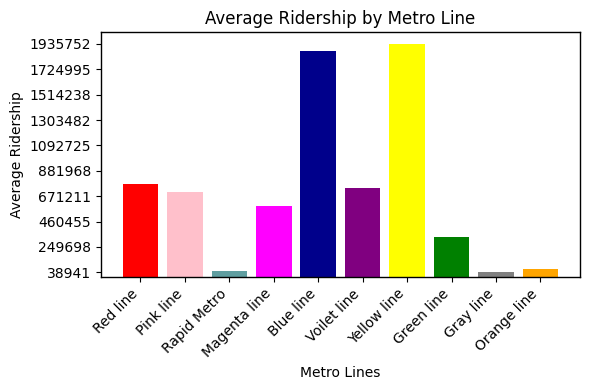

In [352]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(6, 4))
plt.bar(list(ridership_data['Line']), list(ridership_data['Average Ridership']), color=[line_colors[line] for line in list(ridership_data['Line'])])
plt.xlabel('Metro Lines')
plt.ylabel('Average Ridership')
plt.title('Average Ridership by Metro Line')
plt.xticks(rotation=45, ha='right')  
min_value = ridership_data['Average Ridership'].min()
max_value = ridership_data['Average Ridership'].max()
plt.yticks(np.linspace(min_value, max_value, num=10))
plt.gca().get_yaxis().set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
plt.tight_layout()
for spine in plt.gca().spines.values():
    spine.set_linewidth(1)  
    spine.set_color('black')  
plt.show()



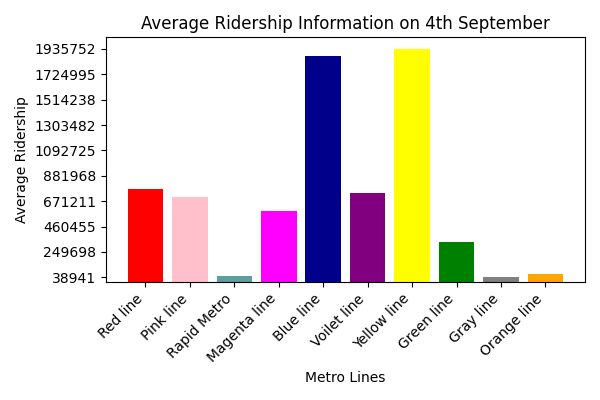

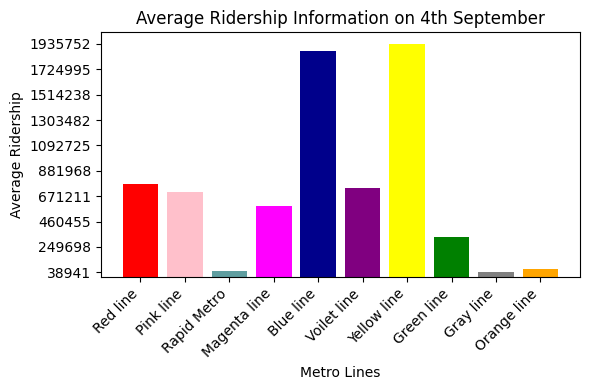

In [353]:
import folium
import pandas as pd
from io import BytesIO
import matplotlib.pyplot as plt
import base64
import warnings
rider_colors = {
    "Red line": "red",
    "Pink line": "pink",
    "Rapid Metro": "blue",
    "Magenta line": "magenta",
    "Blue line": "cyan",
    "Voilet line": "purple",
    "Yellow line": "yellow",
    "Green line": "green",
    "Gray line": "gray",
    "Orange line": "orange"
}

line_colors = {
    'Red line': 'red',
    'Blue line': 'darkblue',
    'Yellow line': 'yellow',
    'Green line': 'green',
    'Voilet line': 'purple',
    'Pink line': 'pink',
    'Magenta line': 'magenta',
    'Orange line': 'orange',
    'Rapid Metro': 'cadetblue',
    'Aqua line': 'lightblue',
    'Green line branch': 'lightgreen',
    'Blue line branch': 'blue',
    'Gray line': 'gray'
}


def plot_bar():
    plt.figure(figsize=(6, 4))
    plt.bar(list(ridership_data['Line']), list(ridership_data['Average Ridership']), color=[line_colors[line] for line in list(ridership_data['Line'])])
    plt.xlabel('Metro Lines')
    plt.ylabel('Average Ridership')
    plt.title('Average Ridership Information on 4th September')
    plt.xticks(rotation=45, ha='right')  
    min_value = ridership_data['Average Ridership'].min()
    max_value = ridership_data['Average Ridership'].max()
    plt.yticks(np.linspace(min_value, max_value, num=10))
    plt.gca().get_yaxis().set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
    plt.tight_layout()

def get_plot_html():
    buffer = BytesIO()
    plot_bar()
    plt.savefig(buffer, format='png')
    buffer.seek(0)
    data_uri = base64.b64encode(buffer.read()).decode('utf-8')
    return f'<img src="data:image/png;base64,{data_uri}" alt="Average Ridership Information on 4th September" style="margin-top: 10px; display: block; margin-left: auto; margin-right: auto;">'

delhi_map = folium.Map(height='100%', location=[28.7041, 77.1025], zoom_start=12)

# Plot metro lines
for line, stations in stations_by_line:
    color = line_colors.get(line, 'black')  
    stations_sorted = stations.sort_values(by='Distance from Start (km)')  
    coordinates = [(station['Latitude'], station['Longitude']) for index, station in stations_sorted.iterrows()]
    folium.PolyLine(
        locations=coordinates,
        color=color,
        weight=5,
        opacity=1,
        tooltip=line
    ).add_to(delhi_map)


for index, row in ridership_data.iterrows():
    line = row['Line']
    color = line_colors.get(line, 'black')  
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],  
        popup=f"Average Daily Ridership: {row['Average Ridership']}",
        tooltip=f"{line}",
        icon=folium.Icon(color=color, icon='info-sign')
    ).add_to(delhi_map)
ridership_html = """
<div style="position: fixed; top: 10px; left: 10px; background-color: white; border: 2px solid black; padding: 10px; border-radius: 10px; width: 250px;">
    <h3 style="margin-bottom: 10px; text-align: center;">Average Ridership Information on 4th September, 2023<br></h3>
    <ul style="list-style-type: none; padding: 0;">
"""

for index, row in ridership_data.iterrows():
    line = row['Line']
    color = rider_colors.get(line, 'black')  
    ridership_html += f"""
        <li style="margin-bottom: 5px; text-align: center; font-size: 14px;">
            <span style="color: {color}; font-weight: bold;">{line}:</span> {row['Average Ridership']}
        </li>
    """

ridership_html += """
    </ul>
</div>

"""
folium.Marker(
    location=[28.7041, 77.4225],  
    icon=folium.DivIcon(html=ridership_html)
).add_to(delhi_map)
folium.Marker(
    location=[28.7041, 77.5225],  
    icon=folium.DivIcon(html=f'{get_plot_html()}')
).add_to(delhi_map)

delhi_map


# Analysis of one of the highest ridership recorded on 13 September 2023, in Delhi Metro by DMRC in history 
## - The analysis of ridership data across different metro lines reveals varying levels of average ridership.
## - Notably, the Yellow line emerges as the most popular among commuters, boasting an average ridership of approximately 1,935,752.
## - Following closely, the Blue line demonstrates significant usage, with an average of around 1,874,167 riders.
## - Other lines such as the Pink line, Magenta line, and Voilet line also exhibit substantial average ridership, ranging from 592,338 to 736,237 riders.
## - In contrast, the Gray line records the lowest average ridership, with only 38,941 commuters.
## - This variation underscores the diverse preferences and usage patterns of commuters across different metro lines, influenced by factors like route connectivity, accessibility, and urban demographics.

# D) TIME series/ TEMPORAL Analysis and E) Ground Layout Analysis

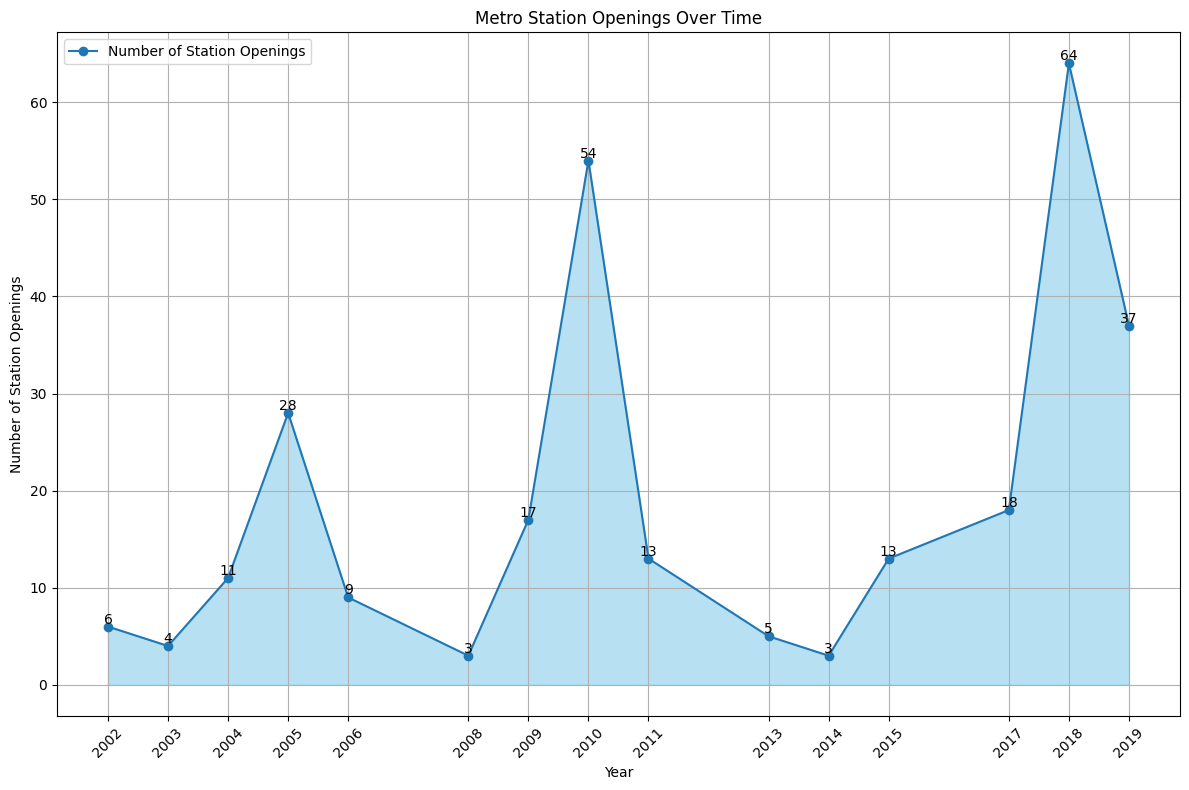

In [354]:
import pandas as pd
import matplotlib.pyplot as plt

metro['Opening Date'] = pd.to_datetime(metro['Opening Date'])
metro['Year'] = metro['Opening Date'].dt.year
station_openings_by_year = metro.groupby('Year').size()

plt.figure(figsize=(12, 8))
plt.plot(station_openings_by_year.index, station_openings_by_year.values, marker='o', linestyle='-', label='Number of Station Openings')

for year, openings in zip(station_openings_by_year.index, station_openings_by_year.values):
    plt.text(year, openings, str(openings), ha='center', va='bottom', fontsize=10)

plt.fill_between(station_openings_by_year.index, station_openings_by_year.values, color='skyblue', alpha=0.6)
plt.title('Metro Station Openings Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Station Openings')
plt.grid(True)
plt.xticks(station_openings_by_year.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


# Analysis
## - The analysis of station openings over time reveals a non-uniform pattern, characterized by fluctuations in growth.
## - The data indicates considerable variability in the rate of station inaugurations across different years.
## - Specifically, the curve illustrates that the highest number of stations were opened in 2018, totaling 64, followed by 2010 with 54 stations, and 2005 with 28 stations.
## - In contrast, the year 2014 saw the lowest number of station openings, with only three stations inaugurated during that period.
## - This analysis sheds light on the temporal dynamics of the metro system's expansion, highlighting both peak years of growth and periods of relatively slow development.


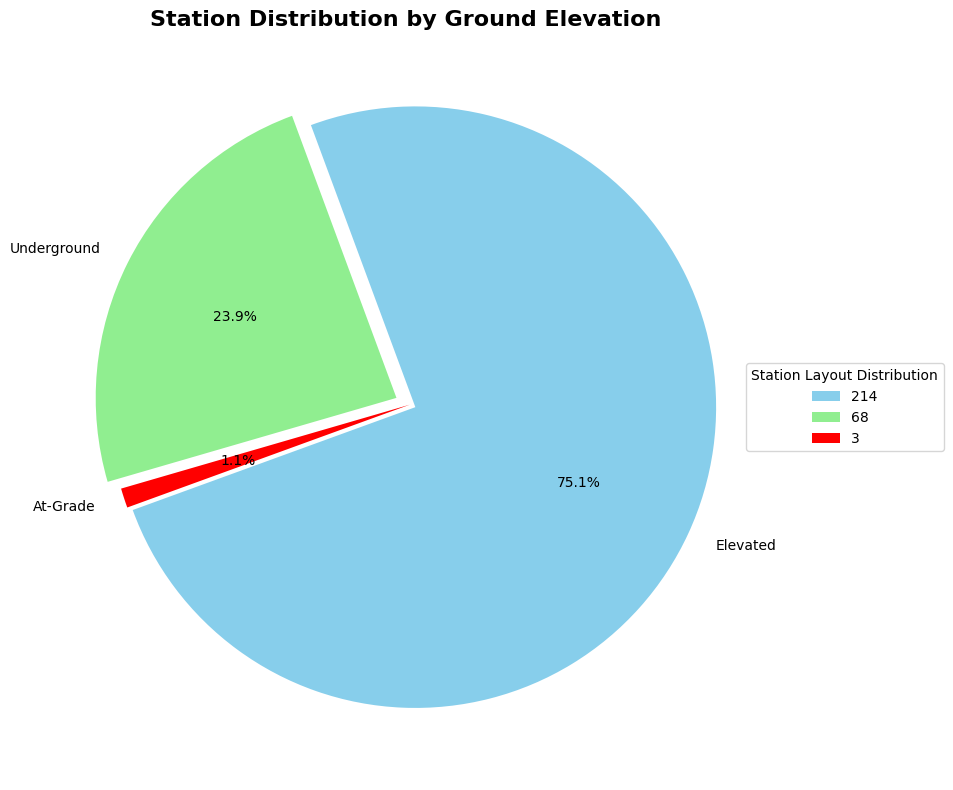

In [355]:
import pandas as pd
import matplotlib.pyplot as plt

station_layout_distribution = metro['Station Layout'].value_counts()

plt.figure(figsize=(8, 8))
colors = ['skyblue', 'lightgreen', 'red'] 
explode = (0.02, 0.05, 0) 
plt.pie(station_layout_distribution, labels=station_layout_distribution.index, autopct='%1.1f%%', startangle=200, colors=colors, explode=explode)
plt.title('Station Distribution by Ground Elevation', fontsize=16, fontweight='bold')  
plt.axis('equal')  
plt.tight_layout() 

plt.legend(station_layout_distribution, loc='center left', bbox_to_anchor=(1, 0.5), title='Station Layout Distribution')

plt.show()


# Analysis
## - The pie chart illustrates the distribution of stations based on their layout. It indicates that the majority of stations, accounting for 75.1% or 214 stations, are elevated above ground level.
## - Additionally, a small proportion, representing 1.1% or 3 stations, are situated at-grade. Underground stations constitute 23.9% of the total, amounting to 68 stations.
## - This breakdown provides insights into the spatial distribution and design characteristics of the metro network, highlighting the prevalence of elevated stations and the relatively smaller number of at-grade and underground stations.


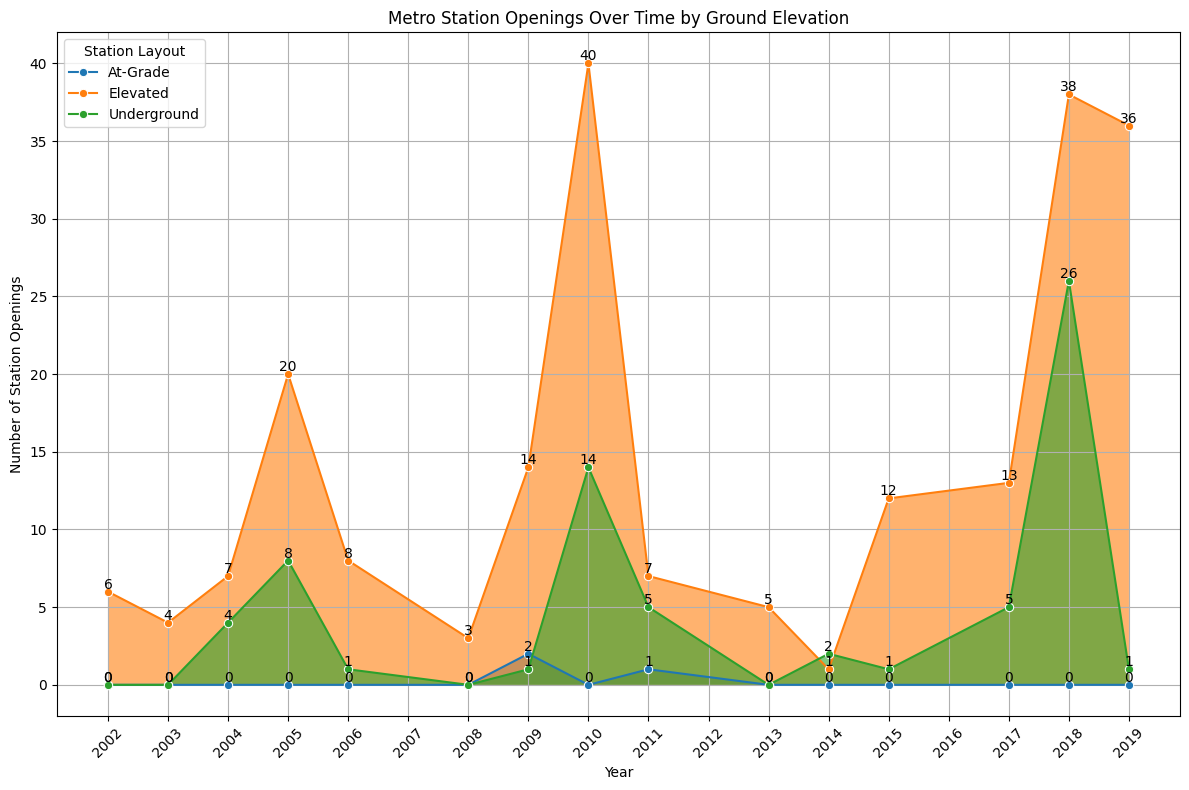

In [356]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

metro['Opening Date'] = pd.to_datetime(metro['Opening Date'])
metro['Year'] = metro['Opening Date'].dt.year

station_openings_by_year_and_layout = metro.groupby(['Year', 'Station Layout']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))

for column in station_openings_by_year_and_layout.columns:
    sns.lineplot(data=station_openings_by_year_and_layout[column], marker='o', label=column)
    plt.fill_between(station_openings_by_year_and_layout.index, 
                     station_openings_by_year_and_layout[column], 
                     alpha=0.6)

for column in station_openings_by_year_and_layout.columns:
    for x, y in zip(station_openings_by_year_and_layout.index, station_openings_by_year_and_layout[column]):
        plt.text(x, y, str(y), ha='center', va='bottom')

plt.title('Metro Station Openings Over Time by Ground Elevation')
plt.xlabel('Year')
plt.ylabel('Number of Station Openings')
plt.grid(True)
plt.xticks(rotation=45)
plt.xticks(range(int(metro['Year'].min()), int(metro['Year'].max()) + 1))
plt.legend(title='Station Layout')
plt.tight_layout()
plt.show()


# Analysis
## - The data outlines the number of metro station openings categorized by their ground elevation (At-Grade, Elevated, Underground) across different years. Notably, Elevated stations dominate the trend, representing the majority of station openings throughout the years.
## - Particularly noteworthy are the years 2010 and 2018, which witnessed significant numbers of Elevated station inaugurations as well as Underground stations, suggesting concentrated development efforts during those periods. In contrast, Underground stations exhibit some variability but generally constitute a smaller fraction of total station openings compared to Elevated counterparts.
## - At-Grade stations, on the other hand, are relatively infrequent, with only sporadic openings observed over the years.
## - This pattern implies a lesser emphasis on At-Grade station construction in the metro network expansion, likely influenced by factors such as spatial constraints and urban planning priorities. Overall, the analysis underscores the prevalent preference for Elevated stations in metro infrastructure development, highlighting the importance of considering ground elevation in urban transportation planning.


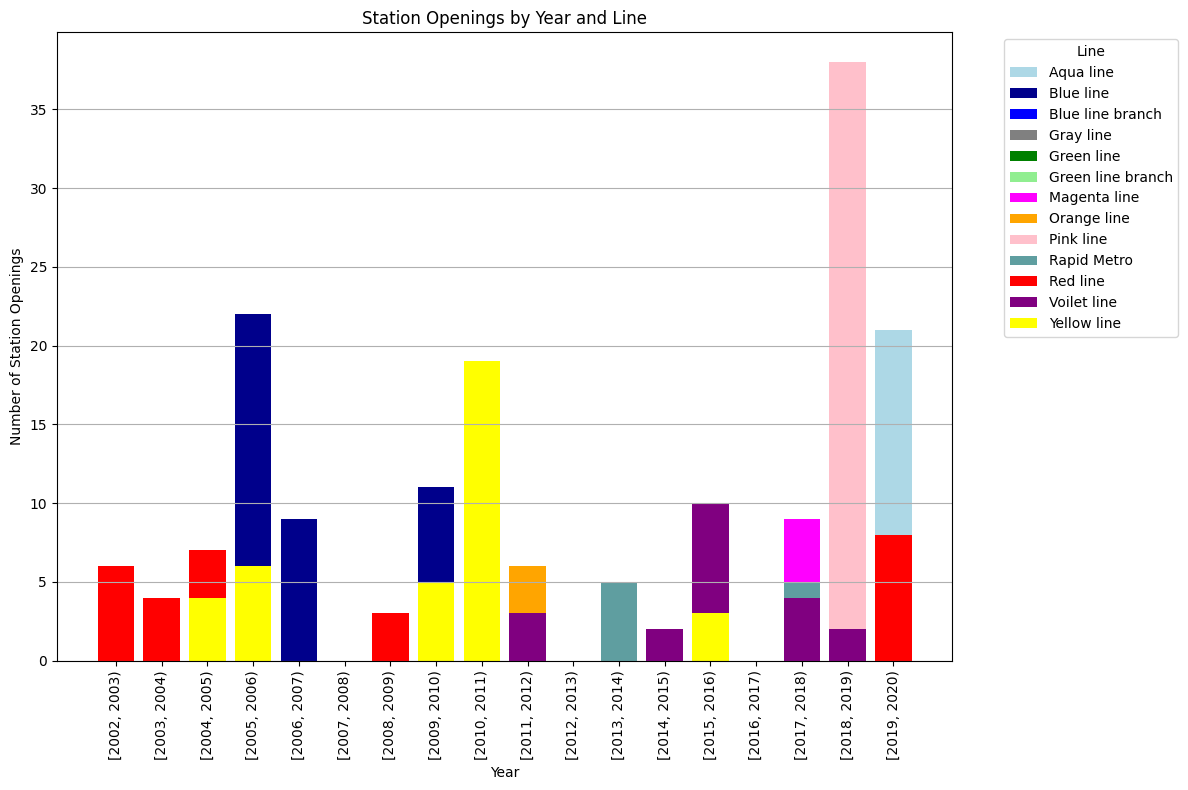

In [357]:
import pandas as pd
import matplotlib.pyplot as plt

line_colors = {
    'Red line': 'red',
    'Blue line': 'darkblue',
    'Yellow line': 'yellow',
    'Green line': 'green',
    'Voilet line': 'purple',
    'Pink line': 'pink',
    'Magenta line': 'magenta',
    'Orange line': 'orange',
    'Rapid Metro': 'cadetblue',
    'Aqua line': 'lightblue',
    'Green line branch': 'lightgreen',
    'Blue line branch': 'blue',
    'Gray line': 'gray'
}

station_openings_by_year_and_line = metro.groupby(['Year', 'Line']).size().unstack(fill_value=0)

year_bins = pd.cut(station_openings_by_year_and_line.index, bins=range(int(station_openings_by_year_and_line.index.min()), int(station_openings_by_year_and_line.index.max()) + 2), right=False)

plt.figure(figsize=(12, 8))
for line in station_openings_by_year_and_line.columns:
    plt.bar(year_bins.codes, 
            station_openings_by_year_and_line[line], 
            color=line_colors[line],
            label=line)

plt.title('Station Openings by Year and Line')
plt.xlabel('Year')
plt.ylabel('Number of Station Openings')
plt.xticks(range(len(year_bins.categories)), year_bins.categories, rotation=90)
plt.legend(title='Line', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Analysis
## - The analysis of station openings by year and line reveals significant variations across different metro lines and time periods.
## - The highest number of station openings within a specific line occurred during the years 2018 to 2019, with the Pink line leading with 38 new stations.
## - This was followed by the Blue line, which saw its peak in station openings between 2005 and 2006, with 22 new stations. Additionally, the Aqua line experienced a surge in station openings during the years 2019 to 2020, totaling 21 new stations.
## - These observations underscore the dynamic nature of metro network expansion, with certain lines experiencing periods of rapid growth at different points in time.


# F) Average and Total Distance Analysis

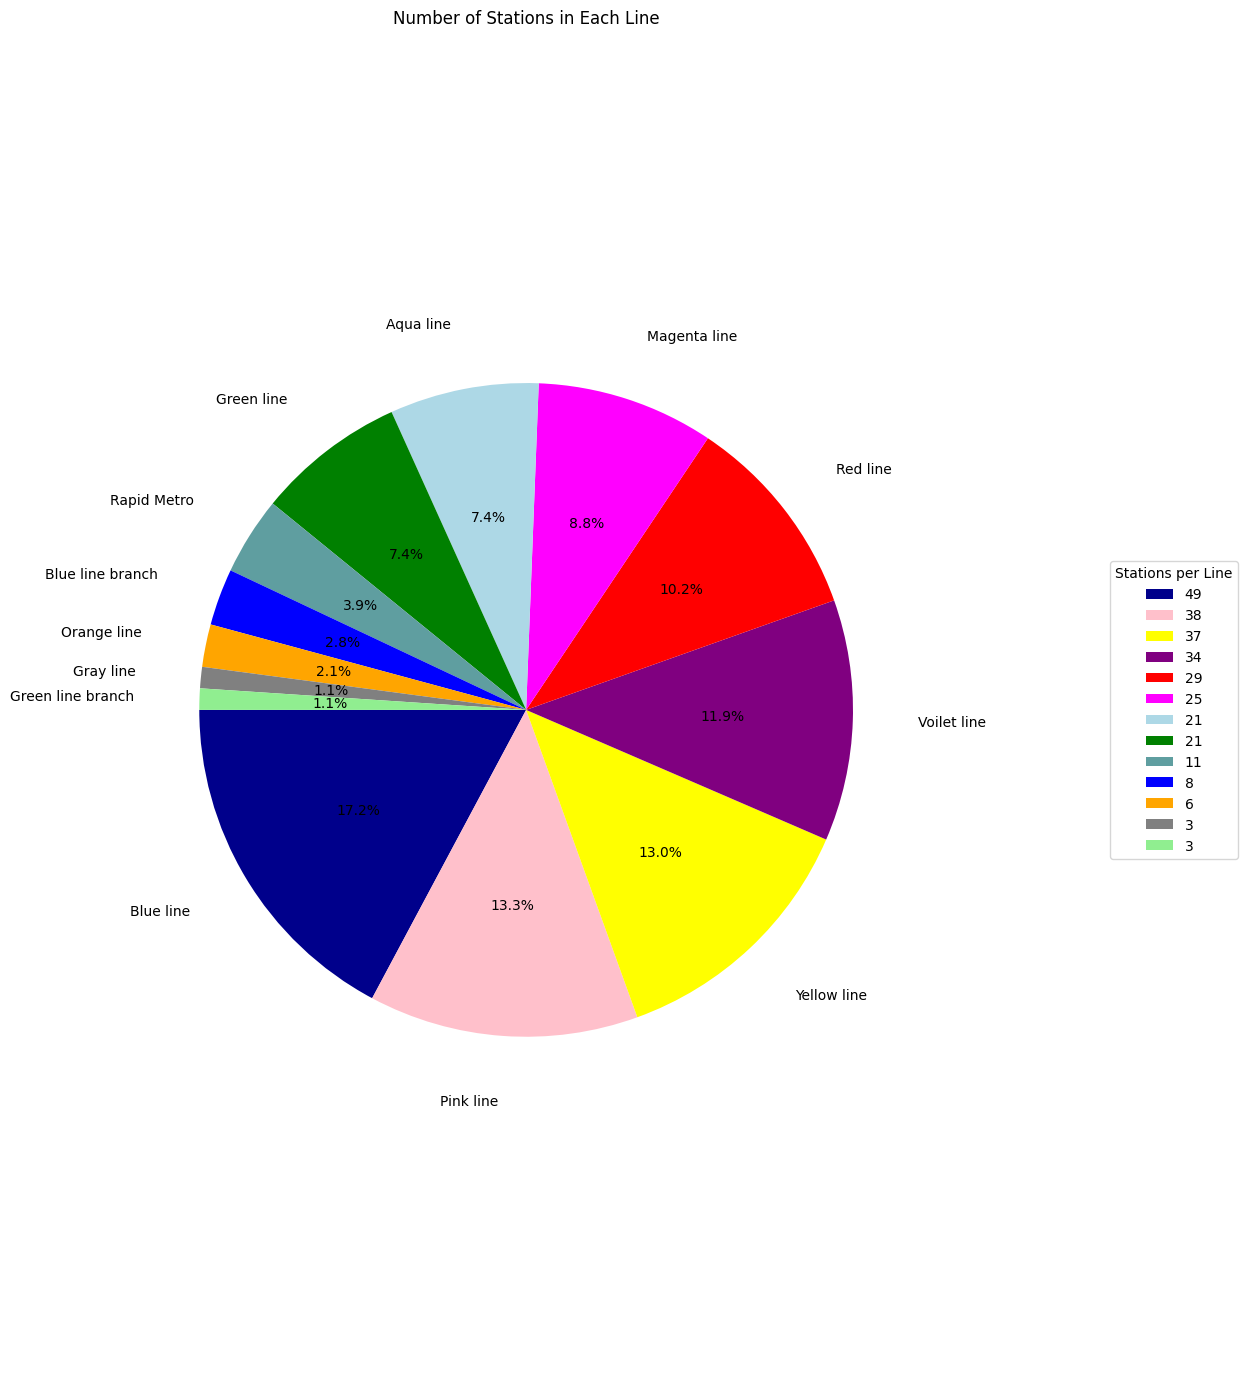

In [358]:
import pandas as pd
import matplotlib.pyplot as plt


line_colors = {
    'Red line': 'red',
    'Blue line': 'darkblue',
    'Yellow line': 'yellow',
    'Green line': 'green',
    'Voilet line': 'purple',
    'Pink line': 'pink',
    'Magenta line': 'magenta',
    'Orange line': 'orange',
    'Rapid Metro': 'cadetblue',
    'Aqua line': 'lightblue',
    'Green line branch': 'lightgreen',
    'Blue line branch': 'blue',
    'Gray line': 'gray'
}

stations_per_line = metro['Line'].value_counts()

plt.figure(figsize=(15, 15))

plt.pie(stations_per_line, labels=stations_per_line.index, autopct='%1.1f%%', startangle=180, labeldistance=1.2, colors=[line_colors[line] for line in stations_per_line.index])
plt.title('Number of Stations in Each Line')
plt.axis('equal') 
plt.legend(stations_per_line, loc='right', bbox_to_anchor=(1.5, 0.5), title='Stations per Line')
plt.tight_layout()
plt.show()




# Analysis
## - The pie chart illustrates the distribution of station openings by metro line color. 
## - Among the lines, the maximum number of stations opened in a single line is 49, while the minimum is 3, as observed in the Gray line.


In [359]:
import pandas as pd
stations_per_line = metro['Line'].value_counts()

total_distance_per_line = metro.groupby('Line')['Distance from Start (km)'].max()

avg_distance_per_line = total_distance_per_line / (stations_per_line - 1)

line_analysis = pd.DataFrame({
    'Line': stations_per_line.index,
    'Number of Stations': stations_per_line.values,
    'Total Distance (km)': total_distance_per_line.values,
    'Average Distance Between Stations (km)': avg_distance_per_line.values
})

line_analysis = line_analysis.sort_values(by='Number of Stations', ascending=False)

line_analysis.reset_index(drop=True, inplace=True)

In [360]:
line_analysis

,Line,Number of Stations,Total Distance (km),Average Distance Between Stations (km)
0,Blue line,49,27.1,1.355000
1,Pink line,38,52.7,1.097917
2,Yellow line,37,8.1,1.157143
3,Voilet line,34,3.9,1.950000
4,Red line,29,24.8,1.240000
5,Magenta line,25,2.1,1.050000
6,Aqua line,21,33.1,1.379167
7,Green line,21,20.8,4.160000
8,Rapid Metro,11,52.6,1.421622
9,Blue line branch,8,10.0,1.000000


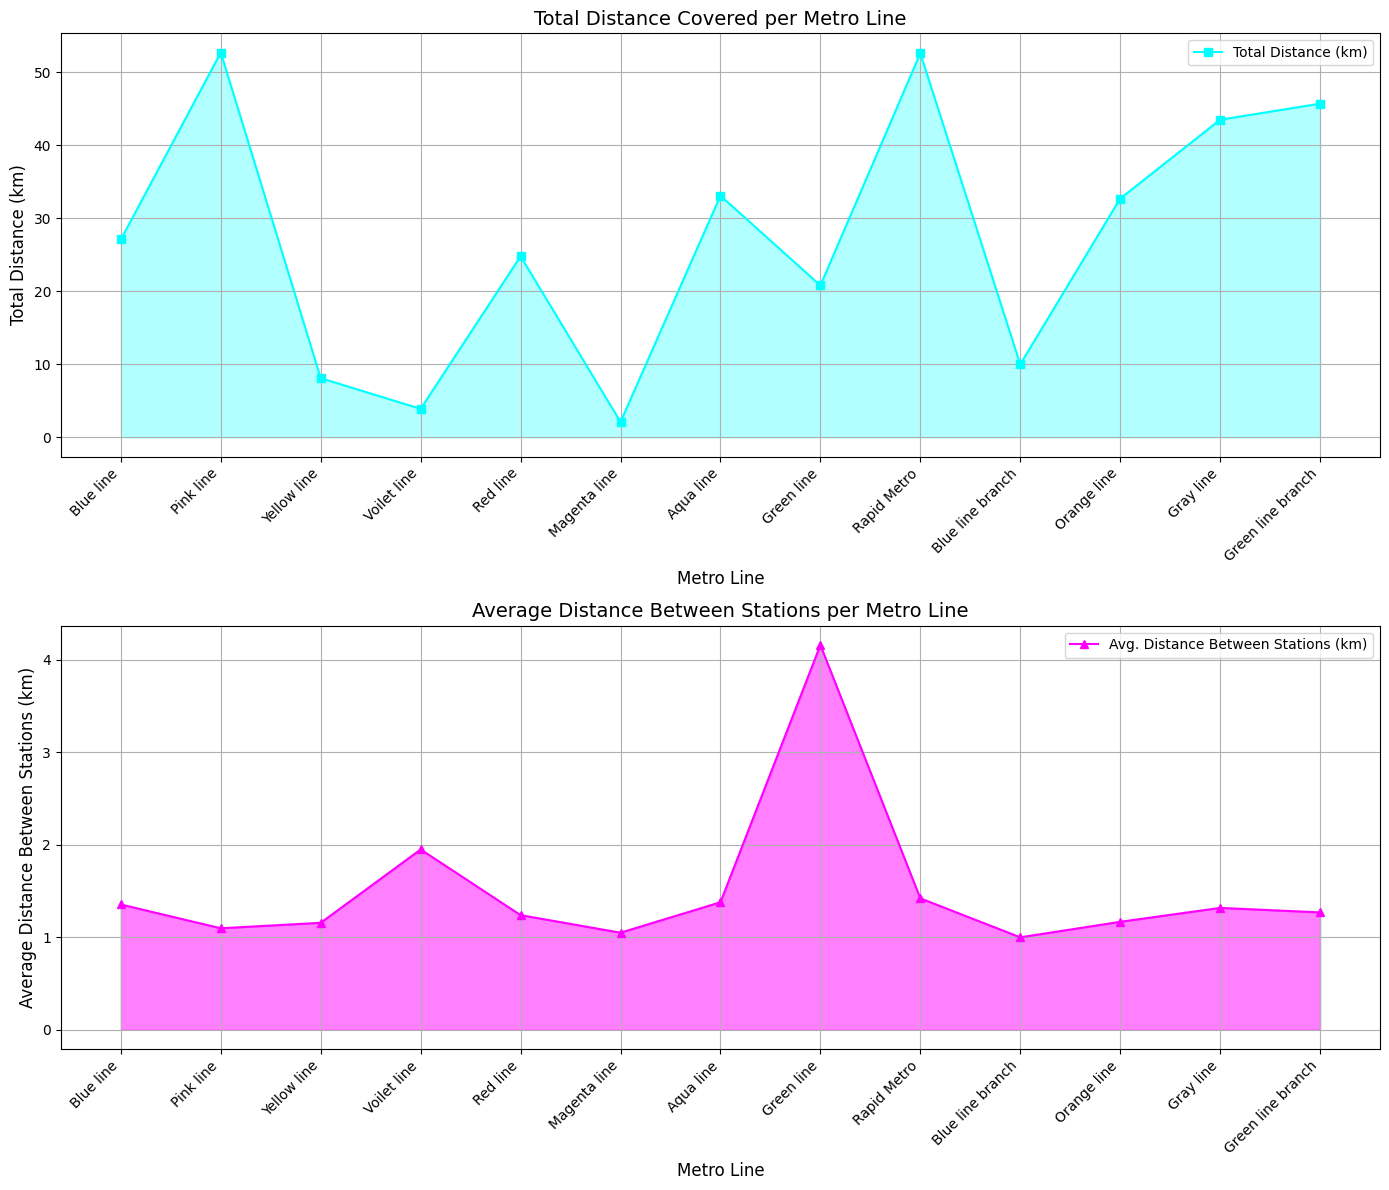

In [361]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 12))

plt.subplot(2, 1, 1)
plt.plot(line_analysis['Line'], line_analysis['Total Distance (km)'], marker='s', color='aqua', label='Total Distance (km)')
plt.fill_between(line_analysis['Line'], line_analysis['Total Distance (km)'], color='aqua', alpha=0.3)
plt.title('Total Distance Covered per Metro Line', fontsize=14)
plt.xlabel('Metro Line', fontsize=12)
plt.ylabel('Total Distance (km)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(line_analysis['Line'], line_analysis['Average Distance Between Stations (km)'], marker='^', color='magenta', label='Avg. Distance Between Stations (km)')
plt.fill_between(line_analysis['Line'], line_analysis['Average Distance Between Stations (km)'], color='magenta', alpha=0.5)
plt.title('Average Distance Between Stations per Metro Line', fontsize=14)
plt.xlabel('Metro Line', fontsize=12)
plt.ylabel('Average Distance Between Stations (km)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
#

# Analysis
## - The **Pink line** emerges as the leader in total distance covered, spanning 52.7 km, followed closely by the **Rapid Metro** and **Aqua line** at 52.6 km and 33.1 km, respectively.
## - Conversely, the **Gray line** exhibits the shortest total distance among all metro lines, covering a mere 43.5 km.
## - Analysis of the average distance between stations unveils noteworthy disparities, with the **Green line** featuring the lengthiest average distance of 4.16 km, indicating comparatively longer distances between stops.
## - In contrast, the **Magenta line** boasts the shortest average distance between stations at 1.05 km, suggesting closer proximity between stops along this route.
## - These insights provide valuable information for urban transportation planning, offering crucial insights into the distribution and layout of metro lines for efficient and effective infrastructure development.
